# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [108]:
import pandas as pd
import plotly.express as px

In [110]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

In [112]:
df_apps = pd.read_csv('apps.csv')

In [114]:
df_apps.head()



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [116]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2419,WRLP CB Repeater,FAMILY,NaN,14,4.90,"1,000",Free,0,Teen,Entertainment,"July 21, 2018",2.1 and up
6324,Rage Z: Multiplayer Zombie FPS Online Shooter,GAME,4.10,11258,44.00,"500,000",Free,0,Mature 17+,Action,"December 8, 2016",4.2 and up
6742,Let's Poke The Egg,GAME,3.40,9051,23.00,"1,000,000",Free,0,Everyone,Arcade,"February 4, 2017",2.3 and up
8560,Live 4D Results ! (MY & SG),LIFESTYLE,4.60,116079,3.20,"5,000,000",Free,0,Everyone,Lifestyle,"May 20, 2018",2.3 and up
3170,GTS-M,TOOLS,4.20,38,0.25,"5,000",Free,0,Everyone,Tools,"January 26, 2017",1.6 and up


In [118]:
print(df_apps.columns)


Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')


In [120]:

df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


In [122]:
nan_rows = df_apps.Rating.isna()
print(nan_rows.shape)


(10841,)


In [124]:
print(type(df_apps_clean))  # Should be a list
print(df_apps_clean[:5])  # Print first 5 items


<class 'list'>
[21     0.00
7182   0.00
7196   0.00
7195   0.00
7194   0.00
       ... 
3413   0.99
5997   0.99
1388   0.99
1327   0.99
7917   0.99
Name: Price, Length: 8199, dtype: float64, 250]


In [132]:
import pandas as pd

# Example: Reload from CSV if needed
df_apps_clean = pd.read_csv("apps.csv")  # Change this to your actual data source

# Now, check the first few rows
print(df_apps_clean.head())



                                            App         Category  Rating  \
0                       Ak Parti Yardım Toplama           SOCIAL     NaN   
1                    Ain Arabic Kids Alif Ba ta           FAMILY     NaN   
2  Popsicle Launcher for Android P 9.0 launcher  PERSONALIZATION     NaN   
3                     Command & Conquer: Rivals           FAMILY     NaN   
4                                    CX Network         BUSINESS     NaN   

   Reviews  Size_MBs Installs  Type   Price Content_Rating           Genres  \
0        0      8.70        0  Paid  $13.99           Teen           Social   
1        0     33.00        0  Paid   $2.99       Everyone        Education   
2        0      5.50        0  Paid   $1.49       Everyone  Personalization   
3        0     19.00        0   NaN       0   Everyone 10+         Strategy   
4        0     10.00        0  Free       0       Everyone         Business   

     Last_Updated         Android_Ver  
0   July 28, 2017          4

In [134]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()



(483, 12)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
190,RT 516 VET,MEDICAL,NaN,0,29.00,10,Free,0,Everyone,Medical,"July 13, 2018",4.0.3 and up
741,Penn State Health OnDemand,MEDICAL,NaN,0,40.00,50,Free,0,Everyone,Medical,"July 24, 2018",4.0.3 and up
803,Maricopa AH,MEDICAL,NaN,0,29.00,100,Free,0,Everyone,Medical,"July 16, 2018",4.0.3 and up
914,Breastfeeding Tracker Baby Log,MEDICAL,NaN,6,23.00,100,Free,0,Everyone,Medical,"July 20, 2018",5.0 and up
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical,"June 6, 2018",4.1 and up


In [136]:
df_apps_clean = df_apps.dropna()

In [138]:
df_apps_clean.shape

(9367, 10)

In [140]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [142]:
df_apps_clean = df_apps_clean.drop_duplicates(subset = ['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean.App == 'Instagram']
                                              

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [144]:
df_apps_clean.shape

(8199, 10)

In [146]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [150]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


In [152]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


In [154]:
highest_rated_apps = df_apps_clean[df_apps_clean['Rating'] == max_rating]
highest_rated_apps.head()  



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [156]:
df_apps_clean.sort_values('Reviews', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [158]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

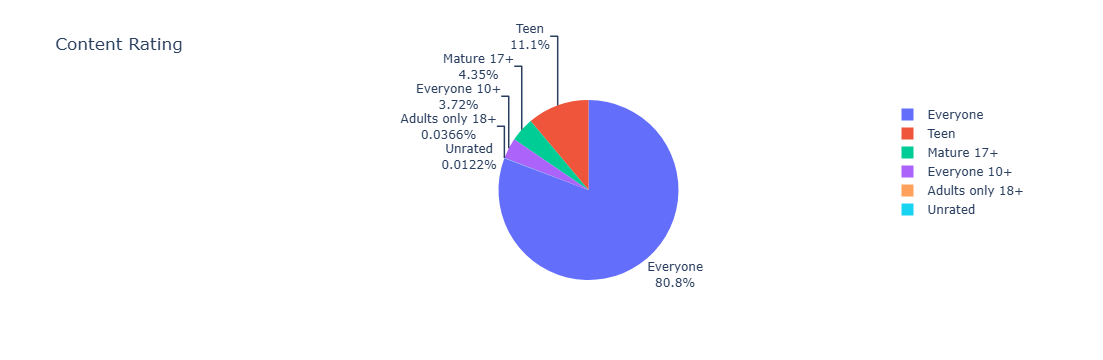

In [160]:
fig= px.pie(labels=ratings.index, 
            values = ratings.values,
           title = 'Content Rating',
           names = ratings.index,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

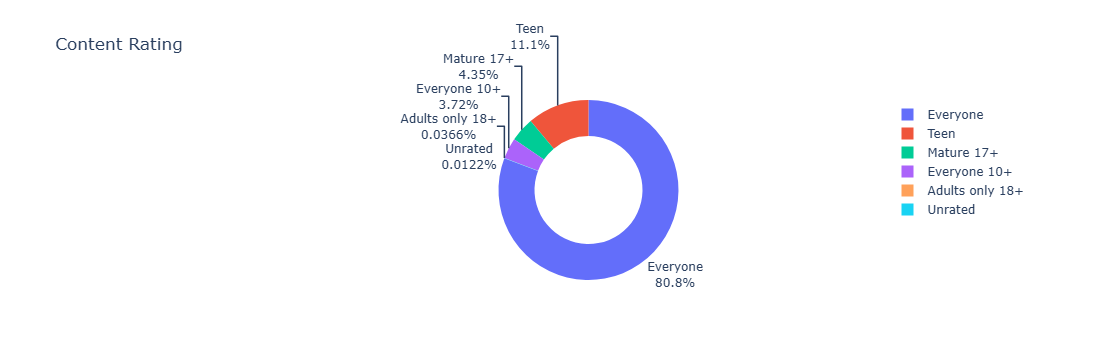

In [162]:
fig= px.pie(labels=ratings.index, 
            values = ratings.values,
           title = 'Content Rating',
           names = ratings.index,
           hole = 0.6,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()


In [164]:
df_apps_clean.sort_values('Installs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10731,My Talking Tom,GAME,4.50,14891223,36.00,"500,000,000",Free,0,Everyone,Casual
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10711,SHAREit - Transfer & Share,TOOLS,4.60,7790693,17.00,"500,000,000",Free,0,Everyone,Tools
10713,imo free video calls and chat,COMMUNICATION,4.30,4785892,11.00,"500,000,000",Free,0,Everyone,Communication
10717,Pou,GAME,4.30,10485308,24.00,"500,000,000",Free,0,Everyone,Casual


In [166]:
installs = df_apps_clean.Installs.value_counts()
installs

Installs
1,000,000        1417
100,000          1096
10,000            988
10,000,000        933
1,000             698
5,000,000         607
500,000           504
50,000            457
5,000             425
100               303
50,000,000        202
500               199
100,000,000       189
10                 69
50                 56
500,000,000        24
1,000,000,000      20
5                   9
1                   3
Name: count, dtype: int64

In [168]:
df_apps_clean.Installs.describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [170]:
df_apps_clean.Installs= df_apps_clean.Installs.astype(str).str.replace(',',"")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


In [153]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('[$,]', '', regex=True)
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean[['App', 'Price']].groupby('Price').count()



,App
Price,
0.00,7595
0.99,104
1.00,2
1.20,1
1.29,1
...,...
299.99,1
379.99,1
389.99,1


In [181]:
df_apps_clean.Category.nunique()

33

In [185]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category


Category
FAMILY             1610
GAME                910
TOOLS               719
LIFESTYLE           302
FINANCE             302
PRODUCTIVITY        301
PERSONALIZATION     298
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

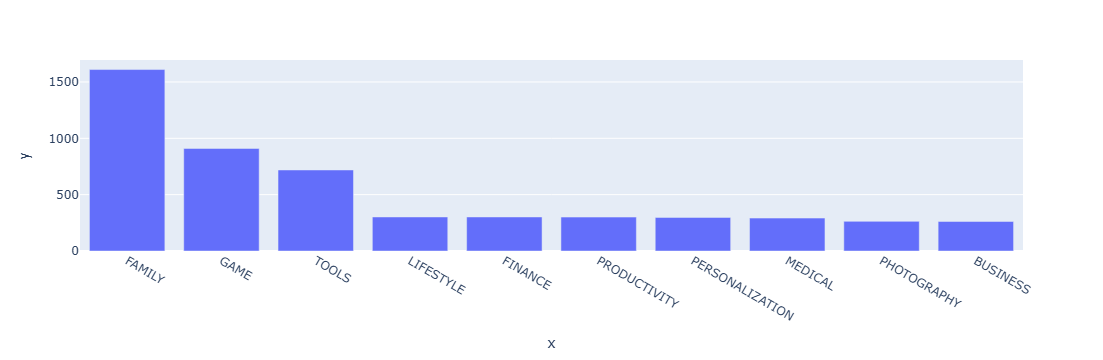

In [189]:
bar = px.bar(x = top10_category.index, y = top10_category.values)
bar.show()

What matters is not just the total number of apps in the category but how often apps are downloaded in that category. This will give us an idea of how popular a category is. 

In [192]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

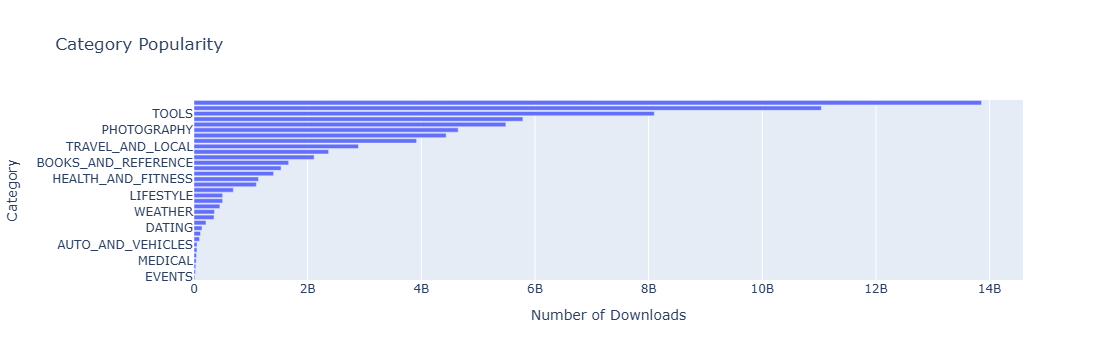

In [198]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

In [200]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})

In [202]:
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1610,4437579590
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


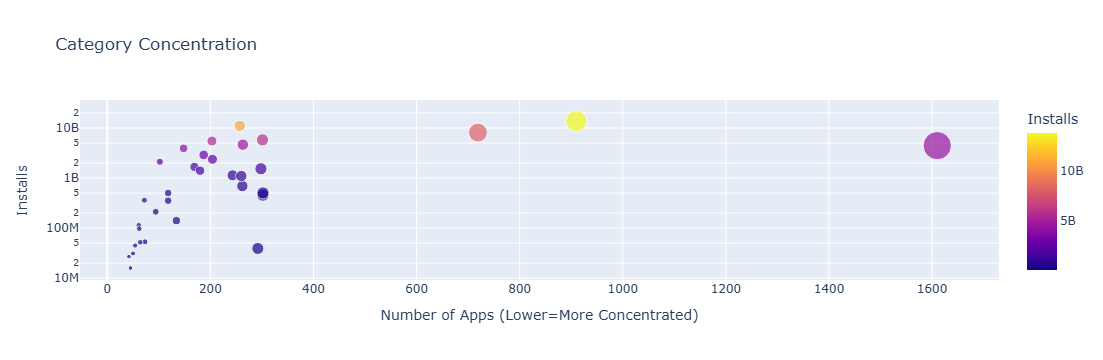

In [204]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()


#### Genres

In [212]:
len(df_apps_clean.Genres.unique())

114

In [214]:
df_apps_clean.Genres.value_counts().sort_values(ascending = True)[:5]

Genres
Board;Pretend Play                     1
Health & Fitness;Action & Adventure    1
Adventure;Brain Games                  1
Lifestyle;Education                    1
Casual;Music & Video                   1
Name: count, dtype: int64

In [216]:
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8579,)
Number of genres: 53


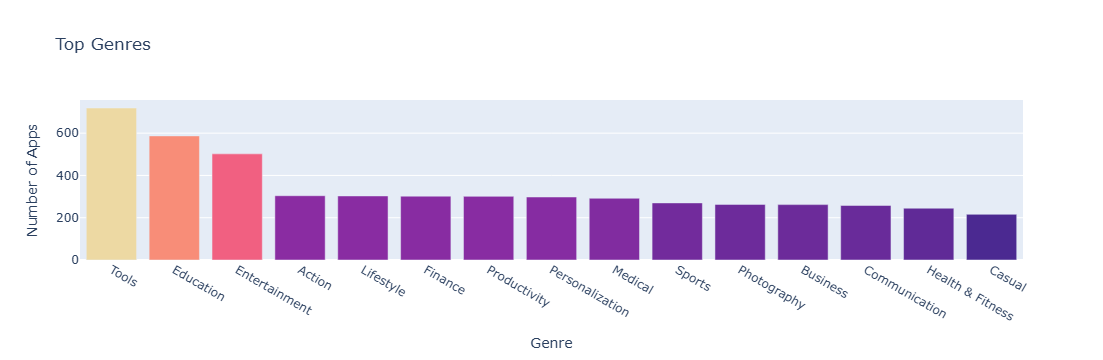

In [218]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

#### Now we’ve looked at the total number of apps per category and the total number of apps per genre. Next = what is the split is between free and paid apps.

In [221]:
df_apps_clean.Type.value_counts()

Type
Free    7595
Paid     604
Name: count, dtype: int64

In [223]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


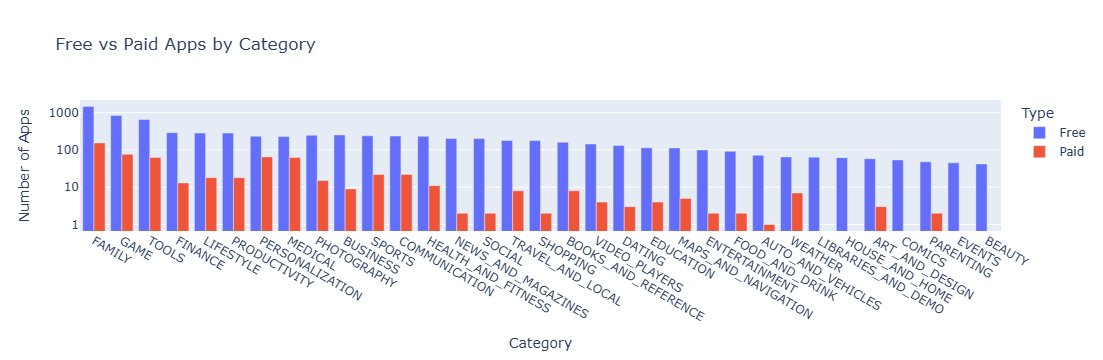

In [225]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()


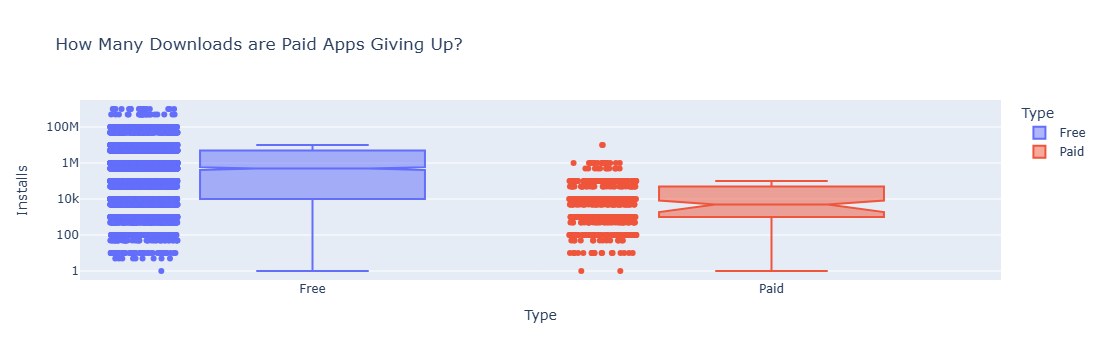

In [227]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

In [231]:
df_paid_apps.Price.median()

2.99

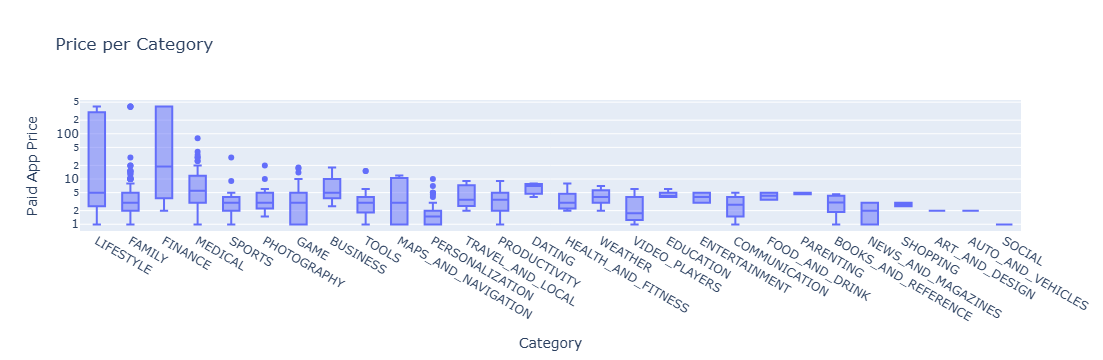

In [233]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()